In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import performance_metrics

from pickle import load

In [2]:
raw_data = pd.read_csv(r"../data/processed_data/oversampled_test.csv", index_col=0)

In [3]:
x = raw_data.drop(["TARGET"], axis=1)
y = raw_data.filter(["TARGET"], axis=1)

scaler = load(open(r"../models/scaler.pkl", "rb"))

x_scaled = scaler.transform(x)
y = y.values.reshape(y.shape[0])

x_scaled.shape, y.shape

((84806, 120), (84806,))

In [4]:
clf = joblib.load(r"../models/logistic_regression/LogisticRegression_v1.02.pkl")

In [5]:
y_pred = clf.predict(x_scaled)


In [6]:
# create a dataframe to house the predictions and true
y_results = pd.DataFrame()
y_results["y_true"] = y
y_results["y_pred"] = y_pred

y_results.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
y_true,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
y_pred,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0


In [7]:
metrics = performance_metrics.metrics(y_results["y_true"], y_results["y_pred"])

In [8]:
metrics.calculate_metrics()

           Score
Accuracy   0.851
Precision  0.856
Recall     0.842
F1-score   0.849
AUC-score  0.851


False positive rate: 14.09%


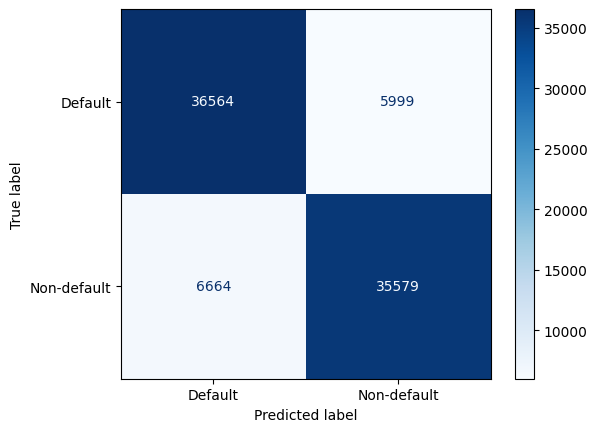

In [9]:
metrics.plot_confusion_matrix()